In [18]:

import tensorflow as tf
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Dense, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('./data_tp1', header=None)
X = df.drop(0, axis=1) / 255
y = tf.one_hot(df[0], depth=10)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model

In [ ]:
def neural_net(X, y, learning_rate = 0.01, epochs = 10, batch_size = 10, hidden_layer_units = 25):
    
    model = Sequential([
        Input(shape=(784,)),
        Dense(hidden_layer_units, activation='sigmoid'),
        Dense(10, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    
    return history

### (Full Batch) Gradient Descent

In [ ]:
learning_rate = 0.5
batch_size = len(y)
epochs = 50

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history


### Stochastic Gradient Descent

In [ ]:
learning_rate = 0.5
epochs = 10
batch_size = 1

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history

### Mini-Batch Gradient Descent

In [ ]:
learning_rate = 0.1
epochs = 10
batch_size = 10

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history

In [ ]:
learning_rate = 0.1
epochs = 10
batch_size = 50

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history

### Differences between hidden layer units

In [ ]:
l25_gd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = len(y), hidden_layer_units = 25).history
l50_gd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = len(y), hidden_layer_units = 50).history
l100_gd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = len(y), hidden_layer_units = 100).history


plt.plot([1 - i for i in l25_gd['accuracy']], label='25 hidden layers')
plt.plot([1 - i for i in l50_gd['accuracy']], label='50 hidden layers')
plt.plot([1 - i for i in l100_gd['accuracy']], label='100 hidden layers')
plt.title("GD")
plt.ylabel("empirical error")
plt.xlabel("epoch")
plt.legend()
plt.show()

l25_sgd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 1, hidden_layer_units = 25).history
l50_sgd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 1, hidden_layer_units = 50).history
l100_sgd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 1, hidden_layer_units = 100).history


plt.plot([1 - i for i in l25_sgd['accuracy']], label='25 hidden layers')
plt.plot([1 - i for i in l50_sgd['accuracy']], label='50 hidden layers')
plt.plot([1 - i for i in l100_sgd['accuracy']], label='100 hidden layers')
plt.title("SGD")
plt.ylabel("empirical error")
plt.xlabel("epoch")
plt.legend()
plt.show()




In [ ]:
l25_mbgd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 10, hidden_layer_units = 25).history
l50_mbgd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 10, hidden_layer_units = 50).history
l100_mbgd = neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 10, hidden_layer_units = 100).history


plt.plot([1 - i for i in l25_mbgd['accuracy']], label='25 hidden layers')
plt.plot([1 - i for i in l50_mbgd['accuracy']], label='50 hidden layers')
plt.plot([1 - i for i in l100_mbgd['accuracy']], label='100 hidden layers')
plt.title("SGD")
plt.ylabel("empirical error")
plt.xlabel("epoch")
plt.legend()
plt.show()

- testar diferentes quantidades da camada oculta e comparar para cada gd

- variar taxa de aprendizado para cada gd

- variar diferentes valores para mini-batch

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,15))

histories = []

# l25_mbgd_0dot5
histories.append(neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 50, hidden_layer_units = 25).history)
# l50_mbgd_0dot5
histories.append(neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 50, hidden_layer_units = 50).history)
# l100_mbgd_0dot5
histories.append(neural_net(X, y, learning_rate = 0.5, epochs = 50, batch_size = 50, hidden_layer_units = 100).history)


# l25_mbgd_1 
histories.append(neural_net(X, y, learning_rate = 1.0, epochs = 50, batch_size = 50, hidden_layer_units = 25).history)
# l50_mbgd_1
histories.append(neural_net(X, y, learning_rate = 1.0, epochs = 50, batch_size = 50, hidden_layer_units = 50).history)
#l100_mbgd_1
histories.append(neural_net(X, y, learning_rate = 1.0, epochs = 50, batch_size = 50, hidden_layer_units = 100).history)

# l25_mbgd_10 
histories.append(neural_net(X, y, learning_rate = 10.0, epochs = 50, batch_size = 50, hidden_layer_units = 25).history)
# l50_mbgd_10
histories.append(neural_net(X, y, learning_rate = 10.0, epochs = 50, batch_size = 50, hidden_layer_units = 50).history)
# l100_mbgd_10
histories.append(neural_net(X, y, learning_rate = 10.0, epochs = 50, batch_size = 50, hidden_layer_units = 100).history)


for i in range(3):
    axes[i].plot([1 - i for i in histories[3*i]["accuracy"]], label='25 hidden layers')
    axes[i].plot([1 - i for i in histories[3*i+1]["accuracy"]], label='50 hidden layers')
    axes[i].plot([1 - i for i in histories[3*i+2]["accuracy"]], label='100 hidden layers')
    axes[i].legend()
# plt.plot([1 - i for i in l25_mbgd['accuracy']], label='25 hidden layers')
# plt.plot([1 - i for i in l50_mbgd['accuracy']], label='50 hidden layers')
# plt.plot([1 - i for i in l100_mbgd['accuracy']], label='100 hidden layers')
# plt.title("SGD - Learning Rate = 0.5")
# plt.ylabel("empirical error")
# plt.xlabel("epoch")
# plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Different Gradient Descents
# GD               -> batch_size = len(y)
GD = len(y)

# SGD              -> batch_size = 1
SGD = 1

# Mini-Batch GD 10 -> batch_size = 10
MBGD10 = 10

# Mini-Batch GD 50 -> batch_size = 50
MBGD50 = 50

# batch_sizes
batch_sizes = [GD, SGD, MBGD10, MBGD50]


# Different learning rates
learning_rates = [0.5, 1.0, 10.0]

# Different number of hidden layers
hidden_layer_units = [25, 50, 100]


h = []

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for hidden_layer_unit in hidden_layer_units:
            h.append(neural_net(X, y, learning_rate = learning_rate, epochs = 50, batch_size = batch_size, hidden_layer_units = hidden_layer_unit).history)

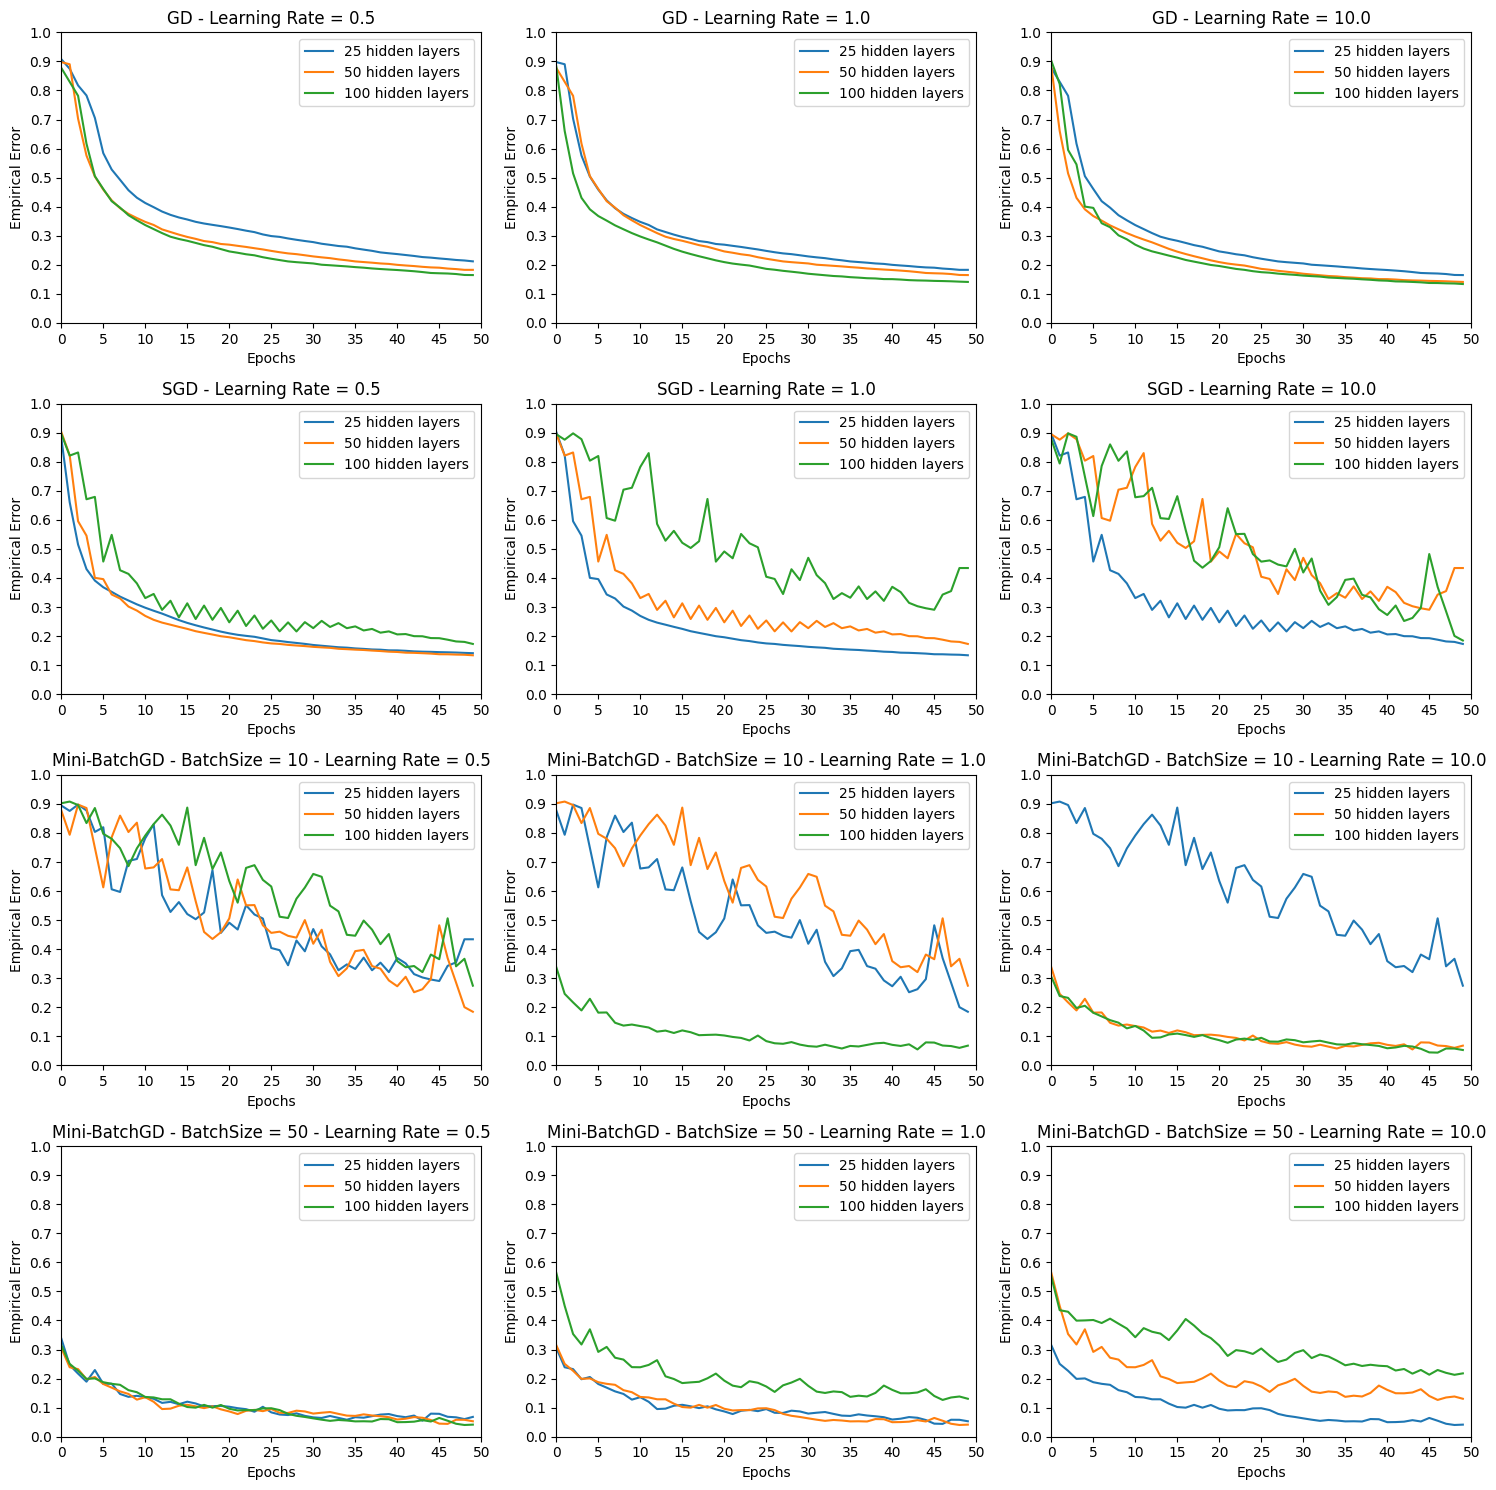

In [24]:

fig, axes = plt.subplots(4,3, figsize=(15,15))

algorithms = ["GD", "SGD", "Mini-BatchGD - BatchSize = 10", "Mini-BatchGD - BatchSize = 50"]



# for each GD algorithm
for i, gd_algorithm in enumerate(algorithms):
    
    # for each learning rate
    for j, learning_rate in enumerate(learning_rates):
        
        axes[i, j].plot([1 - k for k in h[3*i + j + 0]["accuracy"]], label='25 hidden layers')
        axes[i, j].plot([1 - k for k in h[3*i + j + 1]["accuracy"]], label='50 hidden layers')
        axes[i, j].plot([1 - k for k in h[3*i + j + 2]["accuracy"]], label='100 hidden layers')
        axes[i, j].legend()
        
        axes[i, j].set_title(f"{gd_algorithm} - Learning Rate = {learning_rate}")
        axes[i, j].set_xlabel("Epochs")
        axes[i, j].set_ylabel("Empirical Error")
        axes[i, j].set_xlim(0, 50)
        axes[i, j].set_ylim(0, 1)
        axes[i, j].xaxis.set_major_locator(MaxNLocator(integer=True))
        axes[i, j].xaxis.set_major_locator(plt.MultipleLocator(5))
        axes[i, j].yaxis.set_major_locator(plt.MultipleLocator(0.1))   
        
plt.tight_layout()
plt.show()